Nama Lengkap: Ararya Pramadani Alief Rahman  
Username: ararya  
Email: araryap@gmail.com


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

AttributeError: 'NoneType' object has no attribute 'message_types_by_name'

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from google.colab import files
import zipfile
import shutil
import os
import time
from datetime import datetime
import pytz

In [2]:
def get_wib_time():
    tz = pytz.timezone('Asia/Jakarta')
    return datetime.now(tz).strftime('%Y-%m-%d %H:%M:%S %Z%z')

In [9]:
!wget -q https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O rockpaperscissors.zip

In [6]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

shutil.rmtree('data/rockpaperscissors/rps-cv-images')
os.remove('data/rockpaperscissors/README_rpc-cv-images.txt')

: 

In [ ]:
# shutil.rmtree('data')
# os.remove('rockpaperscissors.zip')

In [12]:
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 60 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
def build_model(hp):
    model = Sequential()
    
    # Convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel_size', values=[3, 5]),
        activation='relu',
        input_shape=(150, 150, 3)
    ))
    model.add(MaxPooling2D(2, 2))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=256, max_value=1024, step=256),
        activation='relu'
    ))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [1]:
%pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [14]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='intro_to_kt',
    overwrite=True
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data generators
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#     'images',
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='categorical'
# )

# validation_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = validation_datagen.flow_from_directory(
#     'path/to/validation_data',
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='categorical'
# )

# Perform hyperparameter search
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 5 Complete [00h 00m 29s]

Best val_accuracy So Far: 0.27500000099341076
Total elapsed time: 00h 03m 39s


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


In [75]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
start_time = time.time()
print(f"Training started at: {get_wib_time()}")

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1
)

end_time = time.time()
print(f"Training ended at: {get_wib_time()}")

total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

Training started at: 2024-06-27 13:51:39 WIB+0700
Epoch 1/100
2/2 [==============================] - 1s 578ms/step - loss: 8.2072 - accuracy: 0.1167 - val_loss: 9.6001 - val_accuracy: 0.1000
Epoch 2/100
2/2 [==============================] - 1s 353ms/step - loss: 9.6282 - accuracy: 0.0833 - val_loss: 10.1884 - val_accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 1s 368ms/step - loss: 10.1698 - accuracy: 0.1667 - val_loss: 10.2032 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 1s 366ms/step - loss: 10.1615 - accuracy: 0.0833 - val_loss: 7.5927 - val_accuracy: 0.0750
Epoch 5/100
2/2 [==============================] - 1s 379ms/step - loss: 6.9461 - accuracy: 0.1500 - val_loss: 5.4703 - val_accuracy: 0.1250
Epoch 6/100
2/2 [==============================] - 1s 397ms/step - loss: 4.5216 - accuracy: 0.1500 - val_loss: 3.4403 - val_accuracy: 0.0750
Epoch 7/100
2/2 [==============================] - 1s 369ms/step - loss: 3.2807 - accuracy: 0.1333 -

In [79]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 19ms/step - loss: 5.7751 - accuracy: 0.2250
Validation accuracy: 22.50%


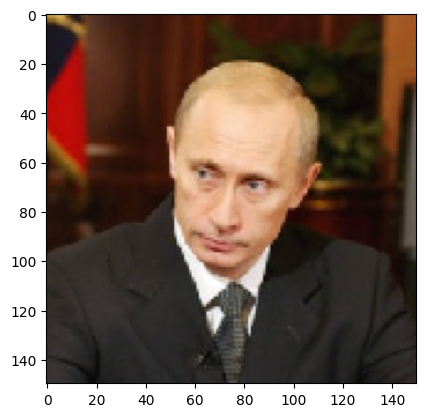

1/1 [==============================] - 0s 43ms/step
Gambar D:\Diksa\Kuliah\PKL\repo github\classification-learn\ipynb\images\Vladimir_Putin\Vladimir_Putin_0004.jpg diprediksi sebagai: ariel


In [80]:
def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    predictions = model.predict(img_array)
    classes = ['ariel', 'arnold', 'colin', 'donald', 'george', 'gerhard', 'hugo', 'jaques', 'tony', 'putin']
    predicted_class = classes[np.argmax(predictions)]

    return predicted_class

uploaded = f"D:\\Diksa\\Kuliah\\PKL\\repo github\\classification-learn\\ipynb\\images\\Vladimir_Putin\\Vladimir_Putin_0004.jpg"

predicted_class = predict_uploaded_image(model, uploaded)
print(f'Gambar {uploaded} diprediksi sebagai: {predicted_class}')